In [34]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import plotnine as p9

In [48]:
df=pd.read_csv("exercise.csv")
df2 = df[:40]
dfpred = df[40:60]

,y,x1,x2
40,NaN,9.87,10.43
41,NaN,9.99,15.72
42,NaN,8.39,0.35
43,NaN,0.80,10.91
44,NaN,9.58,15.82
45,NaN,4.82,11.90
46,NaN,2.97,2.46
47,NaN,8.80,4.09
48,NaN,6.07,1.80
49,NaN,0.19,13.54


In [36]:
df2

,y,x1,x2
0,15.68,6.87,14.09
1,6.18,4.40,4.35
2,18.10,0.43,18.09
3,9.07,2.73,8.65
4,17.97,3.25,17.68
5,10.04,5.30,8.53
6,20.74,7.08,19.50
7,9.76,9.73,0.72
8,8.23,4.51,6.88
9,6.52,6.40,1.26


In [37]:
results = smf.ols('y ~ x1 + x2', data=df).fit()
wyn=results.params

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        11:28:35   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3151      0.388      3.392      0.002       0.530       2.101
x1             0.5148      0.046     11.216      0.000       0.422       0.608
x2             0.8069      0.024     33.148      0.000       0.758       0.856
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           1.341   Prob(JB):                     0.000454
Kurtosis:                       4.428   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

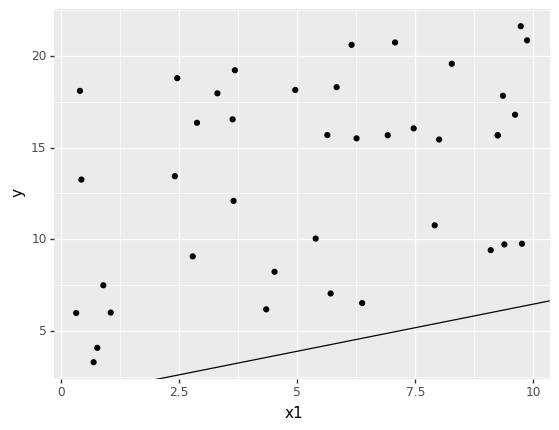

<ggplot: (-9223372036845889240)>

In [31]:
fig1=(p9.ggplot(p9.aes(x='x1',y='y'),data=df2)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x1'])))
fig1

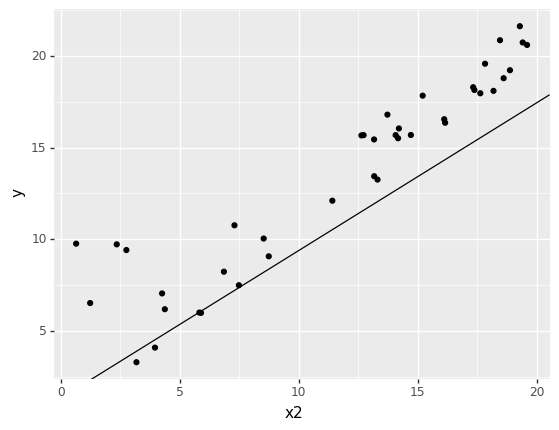

<ggplot: (-9223372036840164604)>

In [41]:
fig1=(p9.ggplot(p9.aes(x='x2',y='y'),data=df2)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x2'])))
fig1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


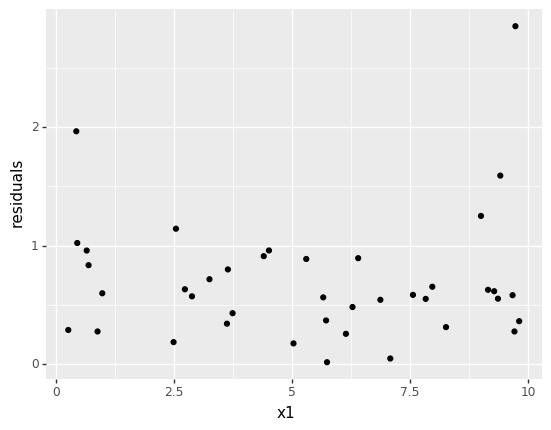

<ggplot: (-9223372036840094652)>

In [66]:
df3=df2
df3['y_pred']=results.predict()
df3['residuals']=abs(df3['y']-df3['y_pred'])
fig1_res=(p9.ggplot(p9.aes(x='x1',y='residuals'),data=df2)
      +p9.geom_point())
fig1_res

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


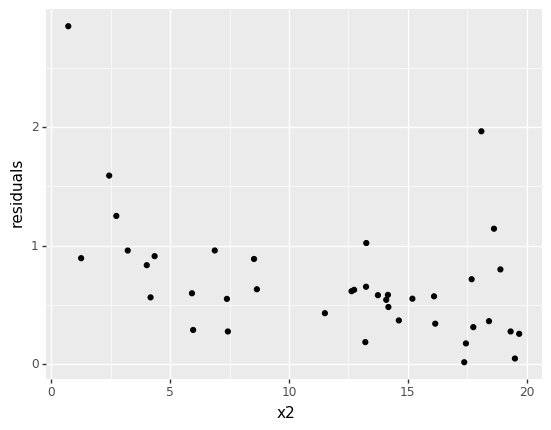

<ggplot: (-9223372036840092820)>

In [65]:
df3=df2
df3['y_pred']=results.predict()
df3['residuals']=abs(df3['y']-df3['y_pred'])
fig1_res=(p9.ggplot(p9.aes(x='x2',y='residuals'),data=df2)
      +p9.geom_point())
fig1_res


In [64]:
results.predict(df[40:60])


40    14.812484
41    19.142865
42     5.916816
43    10.530475
44    19.012485
45    13.398863
46     4.829144
47     9.145767
48     5.892489
49    12.338639
50    18.908561
51    16.064649
52     8.963122
53    14.972786
54     5.859744
55     7.374900
56     4.535267
57    15.133280
58     9.100899
59    16.084900
dtype: float64